In [1]:
!pip install pyspark --quiet

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 56.0 MB/s 


In [2]:
from pyspark import SparkConf,SparkContext
conf = SparkConf().setMaster("local").setAppName("Basics")
sc = SparkContext(conf=conf)

# Popular movie - with RDD

In [ ]:
#User_id, movieid, rating, timestamp
lines = sc.textFile("/content/drive/MyDrive/RTA/Pyspark/data/u_data.txt")
movies = lines.map(lambda x:(int(x.split(",")[1]),1))

In [ ]:
movies.top(5)

[(1661, 1), (1660, 1), (1657, 1), (1656, 1), (1655, 1)]

In [ ]:
moviesCounts = movies.reduceByKey(lambda x,y:x+y)
moviesCounts.top(5)

[(1661, 1), (1660, 1), (1657, 1), (1656, 1), (1655, 1)]

In [ ]:
flipped = moviesCounts.map(lambda x:(x[1],x[0]))
sortedMovies = flipped.sortByKey(ascending=False)

In [ ]:
results = sortedMovies.collect()
top=0

for result in results:
  if top<10: print(result); top+=1
  else: break

(301, 50)
(279, 258)
(268, 100)
(266, 288)
(259, 181)
(241, 286)
(239, 294)
(225, 1)
(220, 7)
(220, 56)


# Popular Movie - With Dataframe

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
spark = (SparkSession.builder.appName("Dataframe").getOrCreate())

In [13]:
import pandas as pd
pandasDF = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/books.csv",error_bad_lines=False)
books = spark.createDataFrame(pandasDF)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [14]:
books.createOrReplaceTempView("books")

In [20]:
spark.sql("""
select language_code,count(title) as count
from books 
group by language_code
order by count DESC
""").show(10)

+-------------+-----+
|language_code|count|
+-------------+-----+
|          eng|10594|
|        en-US| 1699|
|          spa|  419|
|        en-GB|  341|
|          ger|  238|
|          fre|  209|
|          jpn|   64|
|          por|   27|
|          mul|   21|
|          ita|   19|
+-------------+-----+
only showing top 10 rows



In [21]:
spark.sql("""
select title,ratings_count as rating
from books 
order by rating DESC
""").show(10)

+--------------------+-------+
|               title| rating|
+--------------------+-------+
|Harry Potter and ...|5629932|
|Twilight (Twiligh...|4367341|
|The Hobbit or The...|2364968|
|The Catcher in th...|2318478|
|Angels & Demons (...|2279854|
|Harry Potter and ...|2149872|
|Harry Potter and ...|2115562|
|         Animal Farm|2102616|
|The Fellowship of...|2009749|
|Harry Potter and ...|1996446|
+--------------------+-------+
only showing top 10 rows



In [ ]:
movies = (spark.read.format("csv")
            .load("/content/drive/MyDrive/RTA/Pyspark/data/u_data.txt"))

In [ ]:
movie_counts = (movies.select("_c1")
                  .groupBy("_c1").count()
                  .orderBy("count", ascending=False)
                  )

In [ ]:
movie_counts.show(10)

+---+-----+
|_c1|count|
+---+-----+
| 50|  301|
|258|  279|
|100|  268|
|288|  266|
|181|  259|
|286|  241|
|294|  239|
|  1|  225|
|  7|  220|
| 56|  220|
+---+-----+
only showing top 10 rows



# Popular Movie - SparkSQL

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
spark = (SparkSession.builder.appName("Dataframe").getOrCreate())

movies = (spark.read.format("csv")
            .load("/content/drive/MyDrive/RTA/Pyspark/data/u_data.txt"))

movies.createOrReplaceTempView("movies_table")

In [ ]:
spark.sql("""
select _c1,count(*) as count
from movies_table 
group by _c1
order by count DESC
""").show(10)

+---+-----+
|_c1|count|
+---+-----+
| 50|  301|
|258|  279|
|100|  268|
|288|  266|
|181|  259|
|286|  241|
|294|  239|
|  1|  225|
|  7|  220|
| 56|  220|
+---+-----+
only showing top 10 rows



# Spark Connectivity

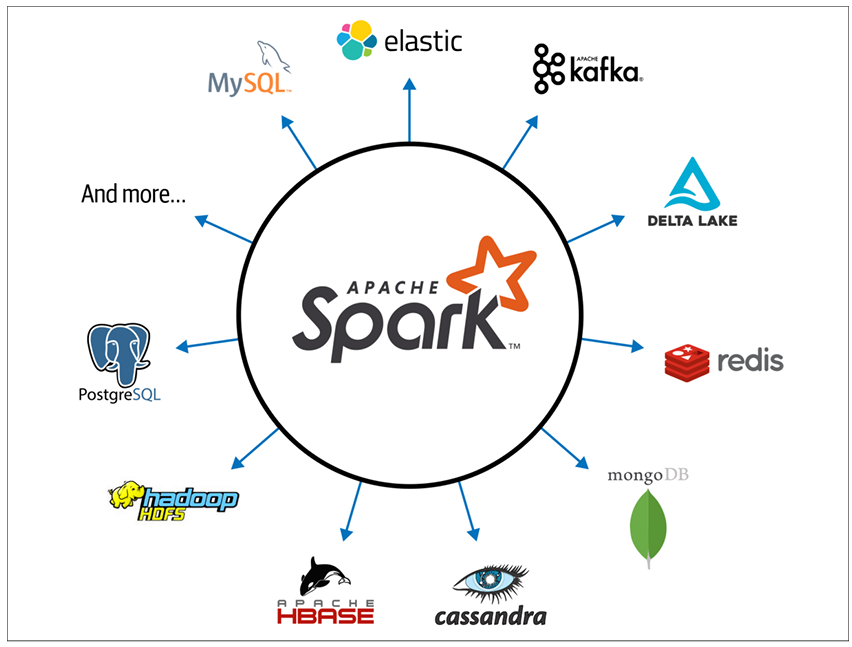

# Spark-Sql Stack

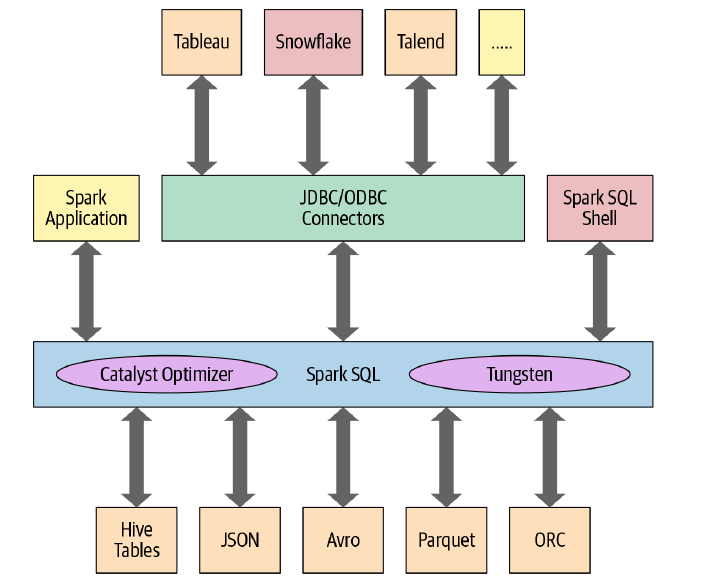

# Spark-Streaming Pipeline

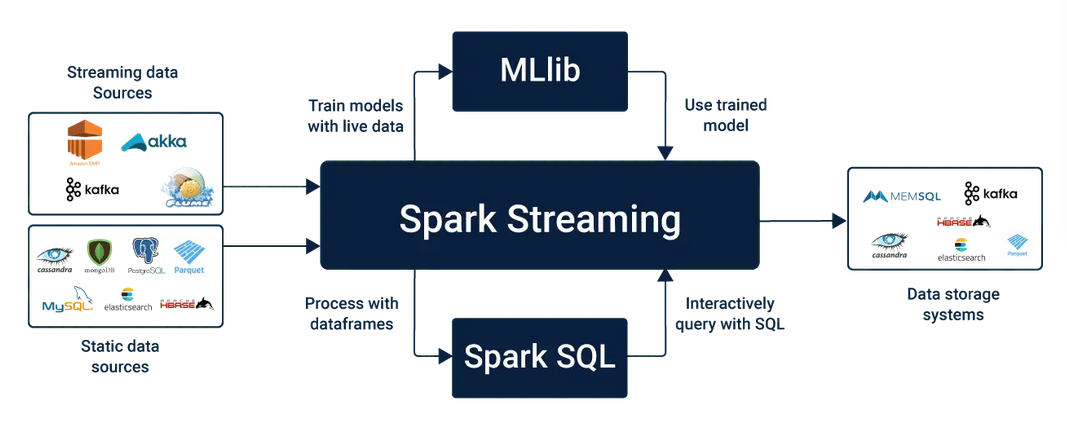

# Core Components of Spark

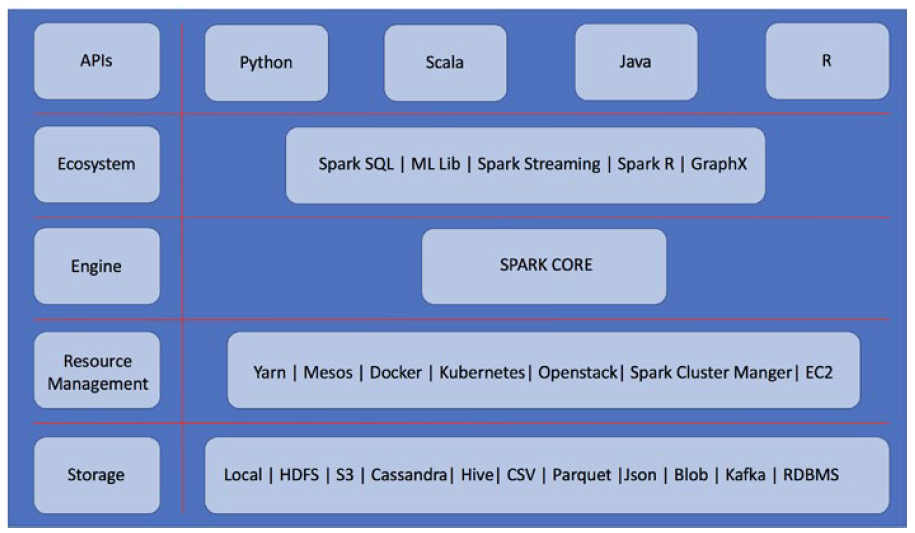

# Spark Structured streaming vs RDD based spark streaming API 

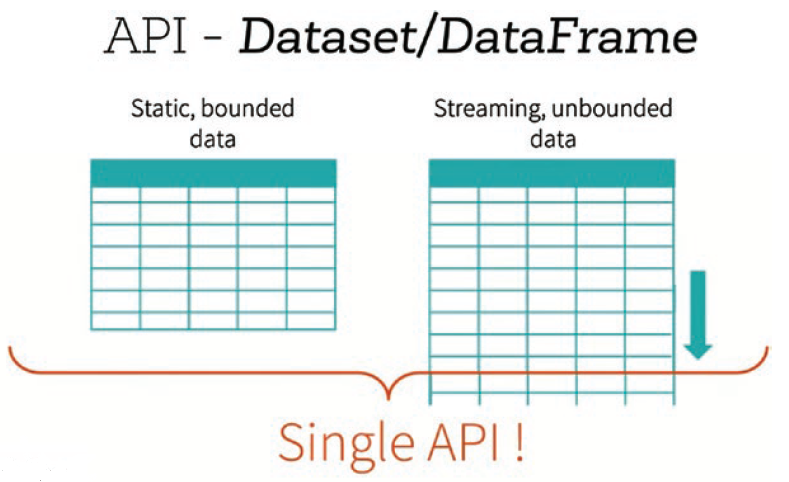

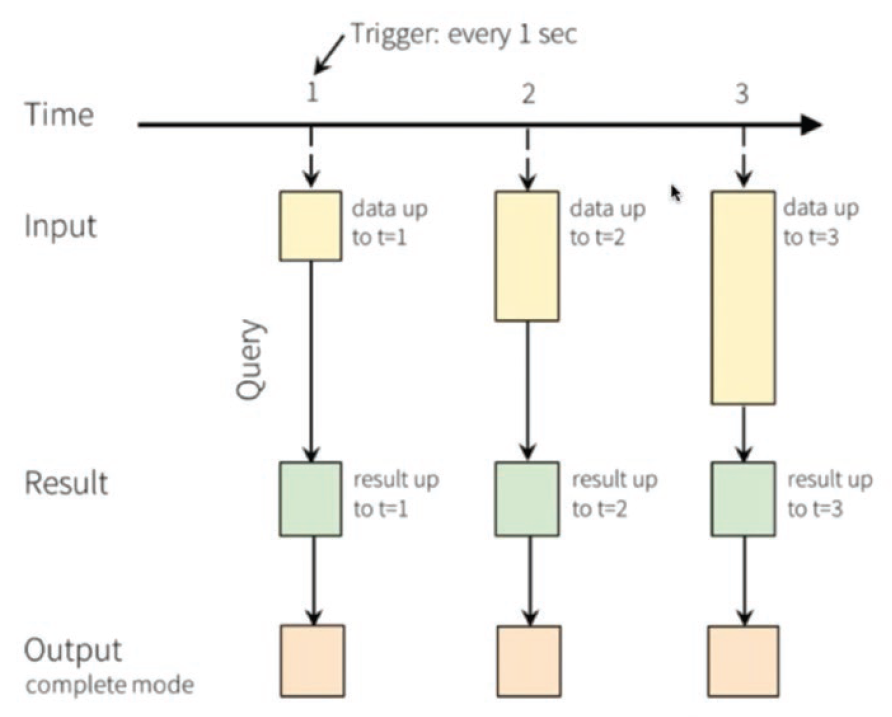

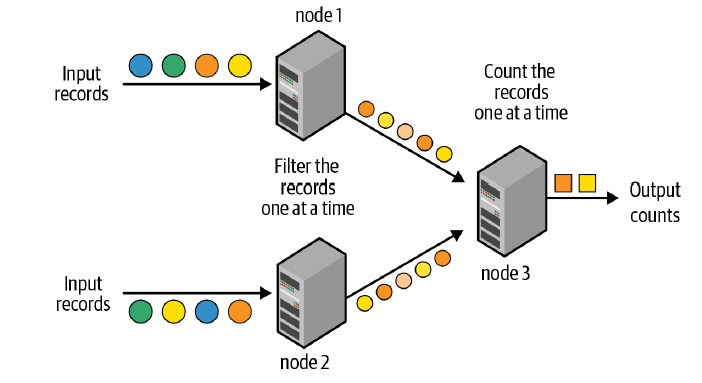

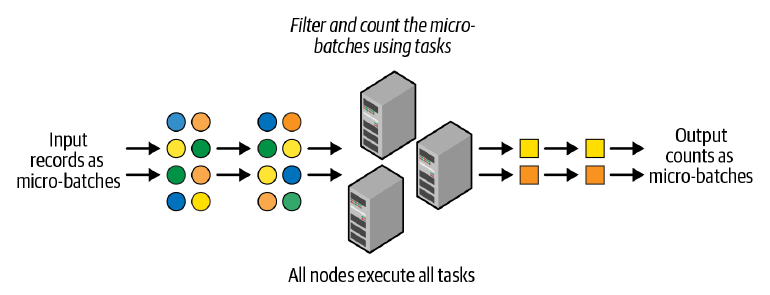

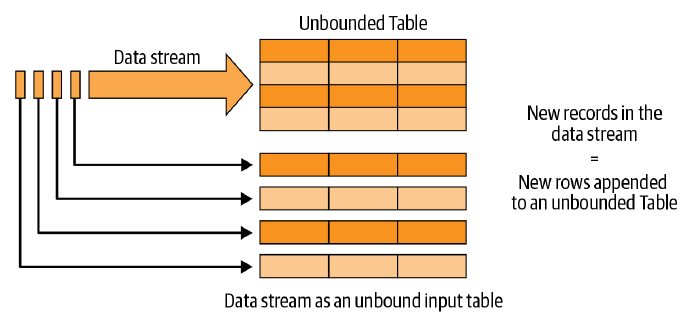

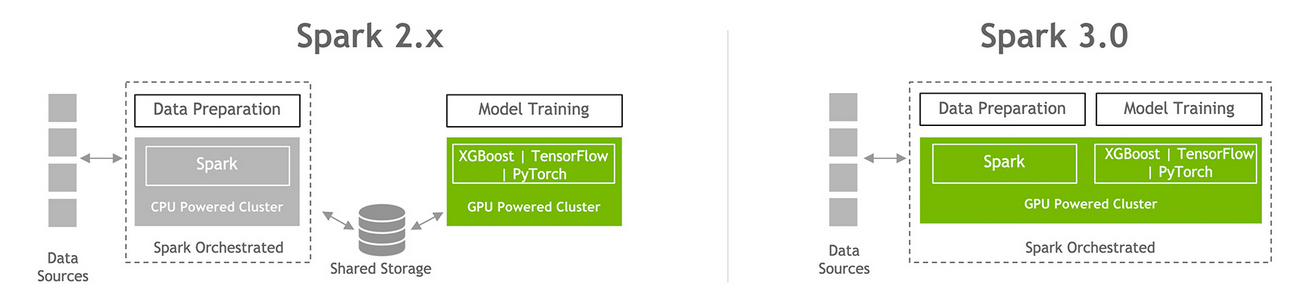